# Spam Detector

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [37]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [38]:
data.info()
data.isna().sum()

# the data has no null values; the data is all numeric.  
# we need only scale it.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [39]:
# To help determine most important factores, evaluate the p value for each factor
# Create an empty dictionary to store results
p_values = {}

# Iterate over factors to see impact on target value
for col1 in data.columns:
    corr, p_val = pearsonr(data[col1], data['spam'])
    p_values[col1] = p_val

# now scan for those less than 0.05 - which we will deem significant.

significant_factors = []
best_factors = []

for c,v in p_values.items():
    if v > 0.05:
        print(c,'exceeds 0.05')
    else:
        significant_factors.append(c)
        if v < 0.00000000000000000000000000000000001:  # this is crazy!  
            best_factors.append(c)  


# this tells us that all columns in the data, except 'word_freq_will', are significant contributors to the value of 'spam'

# check this at office hours.<<<<<<<<<********


word_freq_will exceeds 0.05


<Axes: xlabel='word_freq_over', ylabel='capital_run_length_total'>

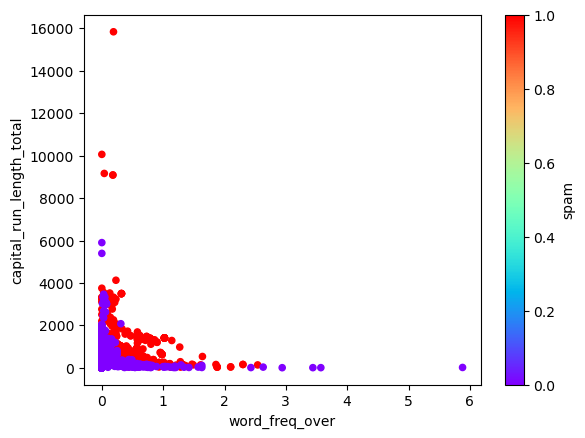

In [69]:
# let's plot some data - looking for linear relationship between features and target, or not
data.plot.scatter(x="word_freq_over",
                y="capital_run_length_total",
                c="spam",
                colormap="rainbow")

# after checking the scatter plot for several features, i can't see a clean linear break separating the values.  It doesn't appear to be linear data.

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

### Prediction: The Random Forests Classifier will get a higher score in this task than Logistic Regression, for two reasons.

### Why?  
The key difference between these models is that the LR assumes linear relationships between features and target.  Random Forests is capable of working with both linear and non-linear relationships between features and target.  Since the scatter plot failed to show linear relationships, I predict that RFC will score higher.

Also, LR model is suitable to a small number of features - this data set has 56 features.  The RFC is better with lots of features, so again it's the better candidate to use here.



## Split the Data into Training and Testing Sets

In [40]:
# Create the labels set `y` and features DataFrame `X`
X = data.drop(columns=['spam'])  # we really only need to drop the target value from our X

y = data['spam']    # target

X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [41]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

# these values are far enough apart to use balanced r2 instead of the normal pandas.test() to evaluate performance

spam
0    2788
1    1813
Name: count, dtype: int64

In [42]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
X_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4576,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.131,0.000,0.000,0.000,0.0,1.488,5,64
4401,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.571,5,11
3707,0.17,0.0,0.17,0.0,0.00,0.00,0.0,0.0,0.8,0.00,...,0.00,0.253,0.168,0.084,0.000,0.024,0.0,4.665,81,1031
2362,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,4.228,53,148
1537,0.00,0.0,0.00,0.0,2.17,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.333,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.125,3,18
2763,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,4.76,0.000,0.000,0.000,0.000,0.000,0.0,1.800,5,9
905,0.00,0.0,0.76,0.0,0.76,0.00,0.5,0.5,0.0,1.01,...,0.00,0.000,0.078,0.000,0.433,0.433,0.0,2.441,19,249
3980,0.00,0.0,0.87,0.0,0.00,0.17,0.0,0.0,0.0,0.00,...,0.34,0.022,0.022,0.000,0.000,0.000,0.0,1.601,11,277


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [43]:

# Create the StandardScaler instance because it never hurts, and there are some values just a bit far from zero
scaler = StandardScaler()

In [44]:
# Fit the Standard Scaler with the training data, and scale the data
X_train_scaled = scaler.fit(X_train).transform(X_train)

X_test_scaled = scaler.fit(X_test).transform(X_test)

X_train_scaled

array([[-0.35811925, -0.16744248, -0.56071981, ..., -0.13974678,
        -0.23023328, -0.37548424],
       [-0.35811925, -0.16744248, -0.56071981, ..., -0.13640572,
        -0.23023328, -0.46466704],
       [ 0.21317665, -0.16744248, -0.22391235, ..., -0.01186062,
         0.13008597,  1.25168127],
       ...,
       [-0.35811925, -0.16744248,  0.94500764, ..., -0.10138496,
        -0.16385868, -0.06418577],
       [-0.35811925, -0.16744248,  1.16294188, ..., -0.1351981 ,
        -0.20178702, -0.01707033],
       [-0.35811925, -0.16744248, -0.56071981, ..., -0.15524447,
        -0.23971537, -0.42933046]])

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [60]:
# Train a Logistic Regression model and print the model score
#from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=1, max_iter=10000)
lr_model.fit(X_train_scaled, y_train)
unscaled_lr_model = LogisticRegression(random_state=1, max_iter=10000)
unscaled_lr_model.fit(X_train,y_train)

# note that i had to raise the value of max_iter in order for the model to successfully processing the fit().

LogisticRegression(max_iter=10000, random_state=1)

In [61]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = lr_model.predict(X_test_scaled)
unscaled_test_predictions = unscaled_lr_model.predict(X_test)
# Review the predictions
testing_predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [63]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.


# Calculate the model's accuracy on the test dataset
#
# also check the results for unscaled data
#
lr_score = accuracy_score(y_test, testing_predictions)
unscaled_lr_score = accuracy_score(y_test,unscaled_test_predictions)

print('lr_scaled_score',lr_score)
print('lr unscaled score',unscaled_lr_score)

# Surprisingly, the model scored a little bit higher using unscaled data than it did scaled data.

lr_scaled_score 0.9287576020851434
lr unscaled score 0.9365768896611643


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [48]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier


In [49]:
# Make and save testing predictions with the saved logistic regression model using the test data
rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled,y_train)    # scaled train

# Review the predictions
rf_train_score = rf_model.score(X_train_scaled,y_train)
rf_train_score

0.9997101449275362

In [50]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
# scaled test
rf_test_score



0.9565595134665508

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

In [ ]:
## Comparison of model performance

The Logistic Regression model scored well on test data: 
- scaled data: 95.7%
- unscaled data: 

The Random Forest Classifier scored slightly better on test data:
- scaled data: 95.7%
- unscaled data: 96.2%

Because the counts of target values were quite far apart (0 appeared 2788 times in the data, while 1 appears 1813 times), I used the balanced r2 formula too, to score these models

LR model, scaled data, balanced r2 = 0.95
Random Forest model, scaled data balanced r2 = .96


In [51]:
#just for fun, let's try the randome forest classifier on UNSCALED data...
unscaled_rf_model = RandomForestClassifier()
unscaled_rf_model.fit(X_train,y_train)  # unscaled training data
unscaled_train_score = unscaled_rf_model.score(X_train,y_train)
unscaled_test_score = unscaled_rf_model.score(X_test, y_test)

print('unscaled train score:',unscaled_train_score)
print('unscaled test score:',unscaled_test_score)

unscaled train score: 0.9997101449275362
unscaled test score: 0.9617723718505647


That was a surprise - when trained on unscaled data, the model had a higher score.





In [53]:
# try djusted r squared to evaluage performance of this model
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

# Calculate the adjusted r-squared value of the model
adj_score1 = round(r2_adj(X_test_scaled, y_test, lr_model), 2)
adj_score2 = round(r2_adj(X_test, y_test, unscaled_lr_model), 2)
adj_score3 = round(r2_adj(X_test_scaled, y_test, rf_model), 2)
adj_score4 = round(r2_adj(X_test, y_test, unscaled_rf_model), 2)
print(f"Logistic regression Scaled Data Adjusted R2: {adj_score1}")
print(f"Logistic regression Unscaled Data Adjusted R2: {adj_score2}")
print(f"Difference: {round(adj_score1-adj_score2, 2)}")

Scaled Data Adjusted R2: 0.95
Unscaled Data Adjusted R2: 0.96
Difference: -0.01
